# Linear Regression

Linear regression is a method that helps us understand the relationship between two variables namely the dependent and independent variable.

A simple linear regression is the same as a line equation.
```python
Y = b + wx
Where x: is the independent variable
    w: is the weight
    b: is the bias term
```
We are going to learn the weight and the bias of the function when training the model.

## 1. Simple Linear Regression

In [1]:
import torch

w = torch.tensor(2.0,requires_grad = True)
b = torch.tensor(-1.0,requires_grad = True)

def forward(x):
    y = b + w*x
    return y
x = torch.tensor([[1.0],[2.5],[3.5]]) #Independent variable
yhat = forward

## 2. Using Class Linear to create models

Linear class is a class found in the <em>nn</em> package of torch.

In [2]:
import torch
from torch.nn import Linear
torch.manual_seed(1) #Initialize the slope and bias randomly
model = Linear(in_features = 1,out_features=1) #Prepare a model with one input and one output
print(list(model.parameters())) #To checkout the parameters

x = torch.tensor([[1.0],[2.0],[1.0],[4.0]]) #Independent variable

yhat = model(x) #Making a prediction

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


The result is a tensor with a prediction for each row.

## 3. Create a custom model by using nn
Inside a package nn there is a class called <strong>Module</strong> that is used to create custom models.

Module class must be inherited to create a custom model

In [3]:
import torch
from torch import nn
class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size): #Take input size and out put size
        # Inherit from parent
        super(LR, self).__init__() #Calling the super constructor
        self.linear = nn.Linear(input_size, output_size) #Making the linear class available in the class
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x) #Do the prediction
        return out
        
lr = LR(1, 1)
    
X= torch.tensor([[1.0], [2.0], [3.0]])
    
yhat=lr(X)
print(yhat)

tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward>)


# Training the Model

<p> Since regression is a method to predict continuous value the inputs may be dispersed. The dispersion in the data can also be determined as a noise. The noise in linear regression is a Guassian noise.</p>
<p>To get a good model we have to calculate the error in the prediction of the model. This can be calculated my using the mean squared method.</p>

We can calculate the loss to see how good the model is performing.
```math
        loss = (y - yhat)^2
        where yhat: is the predicted outcome of the model
        ```
        

The average of the total loss in the inputs is calcuated by the cost function.
The cost function is the total / average loss of a given model.

Inorder to get the optimal cost we are going to use gradient descent or batch gradient descent.

## Gradient descent implementation pytorch

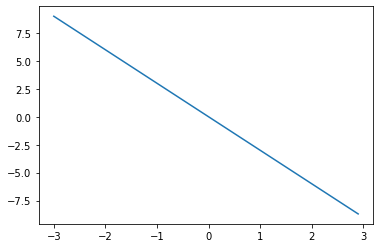

In [4]:
import torch
import matplotlib.pyplot as plt

w = torch.tensor(-10.0,requires_grad = True) #Initialize the weight
x = torch.arange(-3,3,0.1).view(-1,1)
f=-3*x #Map the points to a line with a slope of -3
y = f + 0.1 * torch.randn(x.size())
plt.plot(x.numpy(),f.numpy())
plt.show()

In [5]:
def forward(x): #The forward function to train the model
    return w*x

In [6]:
def criterion(yhat,y):
    return torch.mean((yhat-y)**2) #The cost function

In [7]:
learning_rate = 0.1
COST = []
for epoch in range(4):
    yhat = forward(x)
    loss = criterion(yhat,y)
    loss.backward() #Perform a derivative with respect to each variable in the cost function
    w.data = w.data - learning_rate*w.grad.data #Update the parameters
    w.grad.data.zero_() #Set the grad data to zero
    COST.append(loss.item())


## Optimization in Pytorch

### Create a dataset object

In [8]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*x + 1
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len
    
dataset = Data()

### Create a Custom  Module

In [9]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        out = self.linear(x)
        return out

### Create a cost function

In [10]:
criterion = nn.MSELoss()

### Create a data loader object and create a model

In [11]:
trainloader = DataLoader(dataset=dataset,batch_size = 1)

model = LR(1,1)

### Create an optimizer (Stochastic Gradient Descent)

In [12]:
from torch import nn,optim

optimizer =  optim.SGD(model.parameters(),lr=0.01)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [1823845383768, 1823845671632]}]}

In [13]:
for epoch in range(100):
    for x,y in trainloader:
        
        yhat = model(x)
        loss = criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() #Used to update the parameters